# Introduction
 

The analysis will be based on the results (TMT-6 labelling based protein mass spectrometry) comparing different stages of malaria presented in https://www.ncbi.nlm.nih.gov/pubmed/27917875.  

We will investigate data quality of this quite noisy quantitative proteomics data and apply some simple statistical analysis. 


## Loading data and libraries

Download the table AllQuantProteinsInAllSamples.csv from Moodle and read the file into the R environment (read.csv function). The rownames should be the protein groups given by accession numbers. The table contains log-transformed protein quantifications to compare between replicates and three conditions. 

In [1]:
library(ggbiplot)
library("matrixStats")
library(lattice)
library("qvalue")
Proteinsdata <- read.csv("AllQuantProteinsInAllSamples.csv")
Proteinsdata

载入需要的程辑包：ggplot2

载入需要的程辑包：plyr

载入需要的程辑包：scales

载入需要的程辑包：grid


载入程辑包：‘matrixStats’


The following object is masked from ‘package:plyr’:

    count




X,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.Sample1,Sample.4.d3.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample.1.ECM.Sample2,Sample.2.ECM.Sample2,Sample.3.NI.Sample2,Sample.4.NI.Sample2,Sample.5.d3.Sample2,Sample.6.d3.Sample2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.241506171,0.03959083,-0.25210960,0.13829213,0.10685765,0.20887516,-0.587519956,0.75388647,-0.06748884,-0.105678818,-0.09239498,0.09919612
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.759191178,0.43491715,0.09647712,0.62187844,-0.56548508,-1.34697881,-1.286407376,-0.69466386,1.30191684,0.026209468,-0.62140890,1.27435383
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589",0.490953014,0.39147959,0.06609399,0.60353259,-0.54792340,-1.00413579,-1.124841901,0.34310839,0.94006352,-0.022715688,-0.58522457,0.44961025
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589, P11591",0.225865647,0.40625641,0.12895465,0.51849170,-0.49601878,-0.78354962,NA,NA,NA,NA,NA,NA
A3KGS3,-0.691135928,-0.82335831,-0.84149964,-0.94355487,1.56056207,1.73898669,NA,NA,NA,NA,NA,NA
A6X935,0.433346508,-0.10038903,-0.12820220,-0.06370189,-0.25436482,0.11331142,0.116435031,0.07860939,-0.20549663,0.128932747,-0.03257292,-0.08590762
"B2RSH2, P08752, P18872, P20612, P27600, P27601, P50149, P63094, Q3V3I2, Q6R0H7, Q8CGK7, Q9DC51",-0.018359490,-0.17251581,-0.32081006,-0.28163515,0.43082703,0.36249349,-0.382761999,1.41828527,1.41981201,-0.188232591,-1.62426843,-0.64283425
"C0HKE1, C0HKE2, C0HKE3, C0HKE4, C0HKE5, C0HKE6, C0HKE7, C0HKE8, C0HKE9, P27661, Q64522, Q64523, Q6GSS7, Q8BFU2, Q8CGP5, Q8CGP6, Q8CGP7, Q8R1M2",-0.287069075,-0.18541204,-0.26134146,-0.21753867,0.36503845,0.58632280,NA,NA,NA,NA,NA,NA
E9PV24,0.164582962,-0.10451419,-0.34219281,0.01439906,0.02009986,0.24762512,-0.187940927,-0.53465232,0.92683731,0.342999963,-0.27967117,-0.26757286


•	What does it mean when you have multiple accession numbers? 

first collumn:A2BIM8, B5X0G2, P02762, P04938, P04939, P11589
A2BIM8: Major urinary protein 18
B5X0G2: Major urinary protein 17
P02762: Major urinary protein 6
P04938: Major urinary protein 11
P04939: Major urinary protein 3
P11589: Major urinary protein 2

In [21]:
Proteins <- read.csv("AllQuantProteinsInAllSamples.csv",row.names=1) 
Proteins

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.Sample1,Sample.4.d3.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample.1.ECM.Sample2,Sample.2.ECM.Sample2,Sample.3.NI.Sample2,Sample.4.NI.Sample2,Sample.5.d3.Sample2,Sample.6.d3.Sample2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.241506171,0.03959083,-0.25210960,0.13829213,0.10685765,0.20887516,-0.587519956,0.75388647,-0.06748884,-0.105678818,-0.09239498,0.09919612
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.759191178,0.43491715,0.09647712,0.62187844,-0.56548508,-1.34697881,-1.286407376,-0.69466386,1.30191684,0.026209468,-0.62140890,1.27435383
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589",0.490953014,0.39147959,0.06609399,0.60353259,-0.54792340,-1.00413579,-1.124841901,0.34310839,0.94006352,-0.022715688,-0.58522457,0.44961025
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589, P11591",0.225865647,0.40625641,0.12895465,0.51849170,-0.49601878,-0.78354962,NA,NA,NA,NA,NA,NA
A3KGS3,-0.691135928,-0.82335831,-0.84149964,-0.94355487,1.56056207,1.73898669,NA,NA,NA,NA,NA,NA
A6X935,0.433346508,-0.10038903,-0.12820220,-0.06370189,-0.25436482,0.11331142,0.116435031,0.07860939,-0.20549663,0.128932747,-0.03257292,-0.08590762
"B2RSH2, P08752, P18872, P20612, P27600, P27601, P50149, P63094, Q3V3I2, Q6R0H7, Q8CGK7, Q9DC51",-0.018359490,-0.17251581,-0.32081006,-0.28163515,0.43082703,0.36249349,-0.382761999,1.41828527,1.41981201,-0.188232591,-1.62426843,-0.64283425
"C0HKE1, C0HKE2, C0HKE3, C0HKE4, C0HKE5, C0HKE6, C0HKE7, C0HKE8, C0HKE9, P27661, Q64522, Q64523, Q6GSS7, Q8BFU2, Q8CGP5, Q8CGP6, Q8CGP7, Q8R1M2",-0.287069075,-0.18541204,-0.26134146,-0.21753867,0.36503845,0.58632280,NA,NA,NA,NA,NA,NA
E9PV24,0.164582962,-0.10451419,-0.34219281,0.01439906,0.02009986,0.24762512,-0.187940927,-0.53465232,0.92683731,0.342999963,-0.27967117,-0.26757286


•	Apply the following function on the table: 

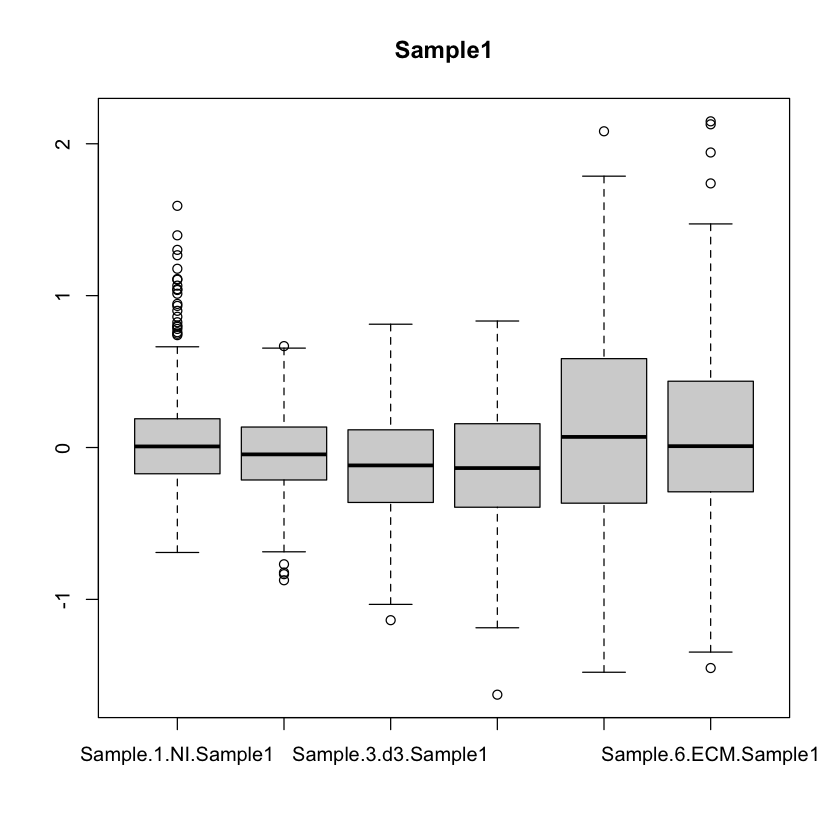

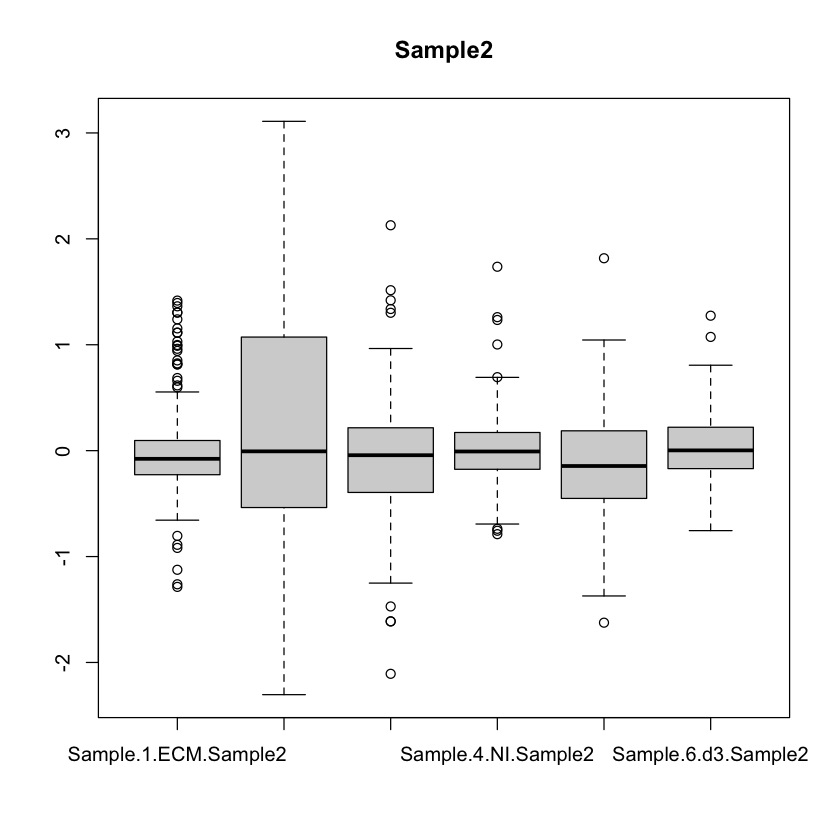

In [3]:
Proteins1<- Proteins[,1:6] 
boxplot(Proteins1, main="Sample1")
Proteins2 <- Proteins[,7:12] 
boxplot(Proteins2, main="Sample2")

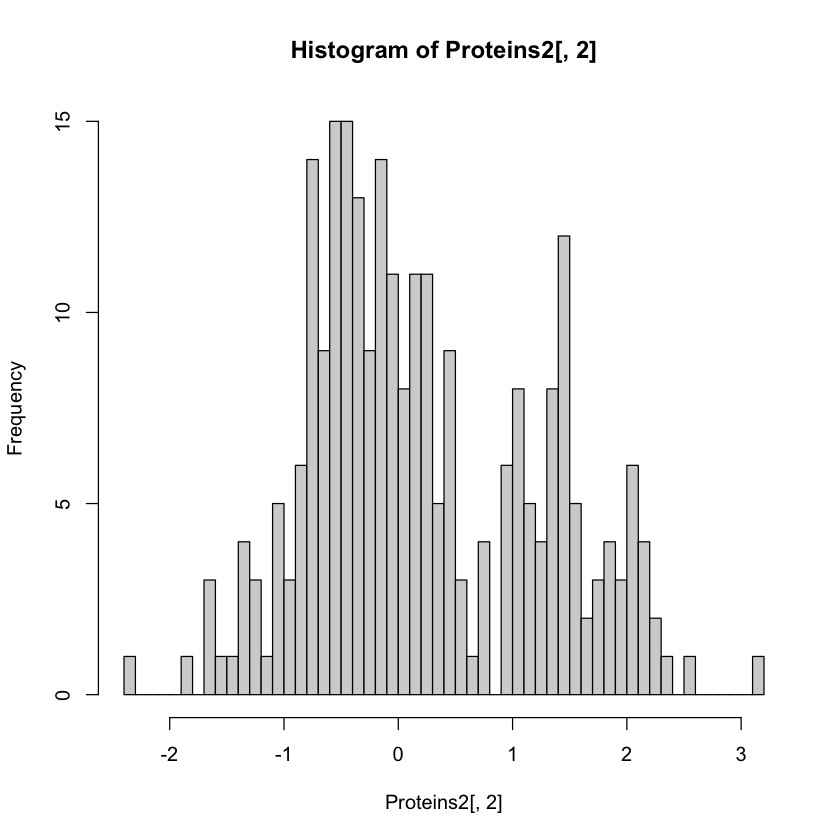

In [189]:
hist(Proteins2[,2],breaks= 50)

•	Make a boxplot and for each of the first four samples a histogram. The figures should be informative so you might have to change the number of bins (argument breaks=). 

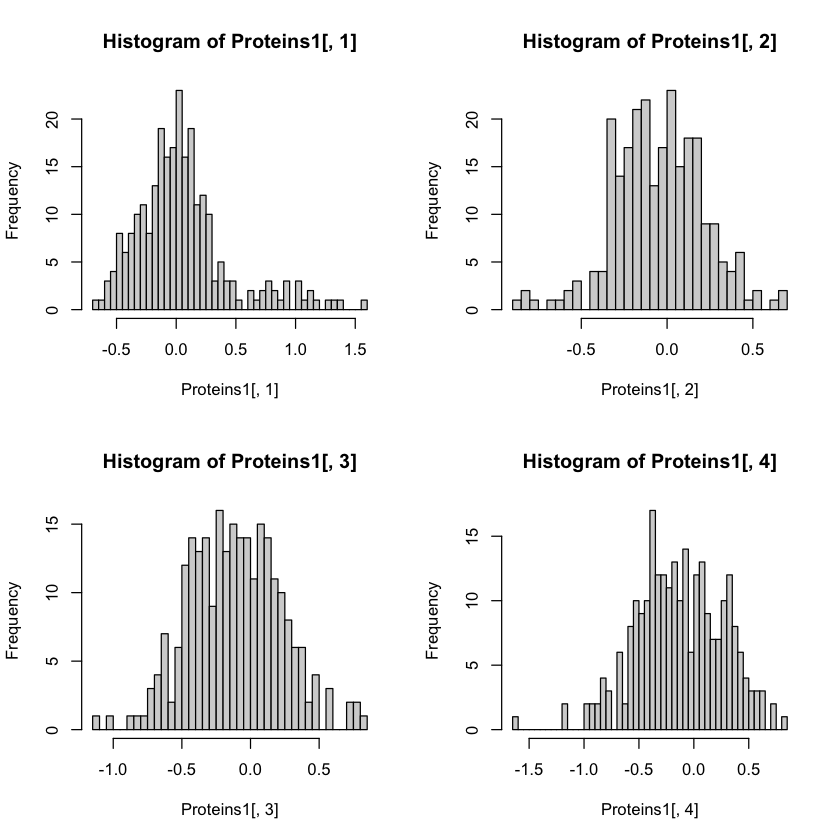

In [4]:
par(mfrow=c(2,2))                            
hist(Proteins1[,1],breaks= 50)
hist(Proteins1[,2],breaks= 50)
hist(Proteins1[,3],breaks= 50)
hist(Proteins1[,4],breaks= 50)

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.Sample1,Sample.4.d3.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample.1.ECM.Sample2,Sample.2.ECM.Sample2,Sample.3.NI.Sample2,Sample.4.NI.Sample2,Sample.5.d3.Sample2,Sample.6.d3.Sample2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.405280425,-0.1241834234,-4.158839e-01,-0.02548213,-0.05691661,0.04510091,-0.587519956,0.75388647,-0.06748884,-0.105678818,-0.09239498,0.09919612
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.662784144,0.3385101149,7.008219e-05,0.52547141,-0.66189211,-1.44338584,-1.286407376,-0.69466386,1.30191684,0.026209468,-0.62140890,1.27435383
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589",0.517973377,0.4184999582,9.311435e-02,0.63055296,-0.52090304,-0.97711542,-1.124841901,0.34310839,0.94006352,-0.022715688,-0.58522457,0.44961025
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589, P11591",0.266916557,0.4473073161,1.700056e-01,0.55954261,-0.45496787,-0.74249871,NA,NA,NA,NA,NA,NA
A3KGS3,-0.677973970,-0.8101963556,-8.283377e-01,-0.93039292,1.57372403,1.75214864,NA,NA,NA,NA,NA,NA
A6X935,0.561504824,0.0277692850,-4.387935e-05,0.06445643,-0.12620650,0.24146973,0.116435031,0.07860939,-0.20549663,0.128932747,-0.03257292,-0.08590762
"B2RSH2, P08752, P18872, P20612, P27600, P27601, P50149, P63094, Q3V3I2, Q6R0H7, Q8CGK7, Q9DC51",-0.133421652,-0.2875779769,-4.358722e-01,-0.39669731,0.31576486,0.24743133,-0.382761999,1.41828527,1.41981201,-0.188232591,-1.62426843,-0.64283425
"C0HKE1, C0HKE2, C0HKE3, C0HKE4, C0HKE5, C0HKE6, C0HKE7, C0HKE8, C0HKE9, P27661, Q64522, Q64523, Q6GSS7, Q8BFU2, Q8CGP5, Q8CGP6, Q8CGP7, Q8R1M2",-0.369840625,-0.2681835895,-3.441130e-01,-0.30031022,0.28226690,0.50355125,NA,NA,NA,NA,NA,NA
E9PV24,0.312942767,0.0438456107,-1.938330e-01,0.16275886,0.16845967,0.39598493,-0.187940927,-0.53465232,0.92683731,0.342999963,-0.27967117,-0.26757286


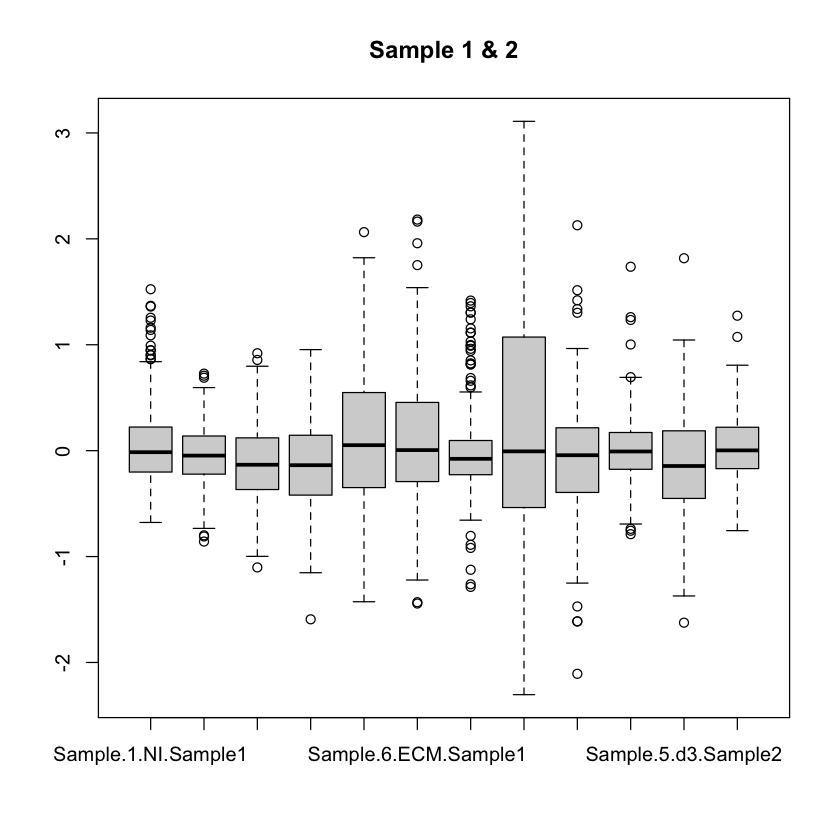

In [5]:
Proteins3 <- Proteins
Proteins3[,1:6] <- Proteins3[,1:6] + matrix(rep(rnorm(nrow(Proteins),0,0.1),6),ncol=6) 
Proteins3
boxplot(Proteins3, main="Sample 1 & 2")

•	Normalize samples (columns) by their median. Check the normalization with a boxplot. 

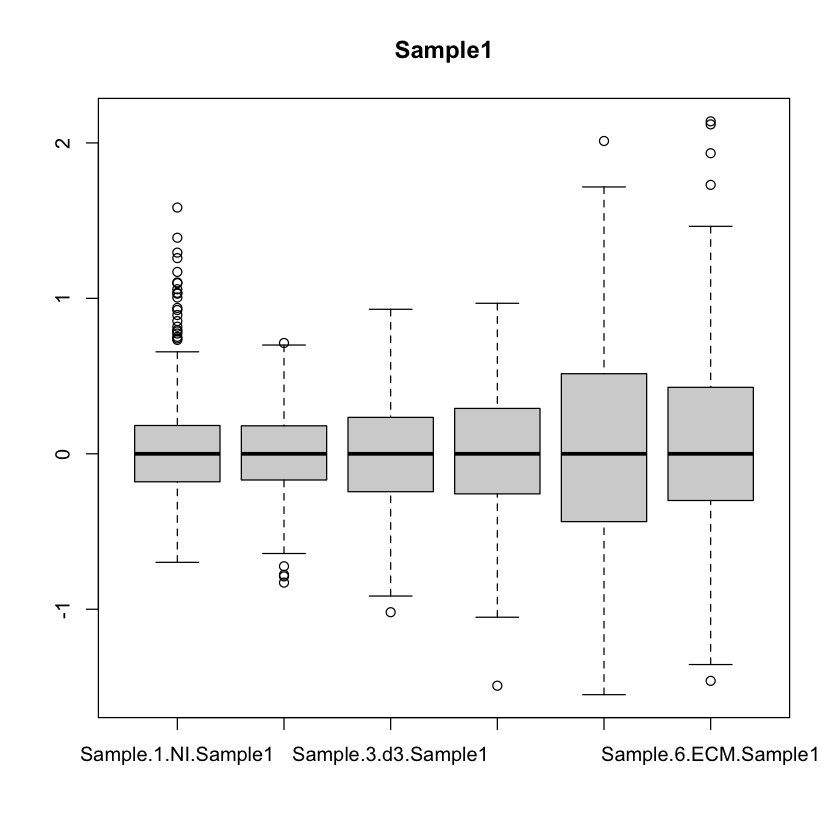

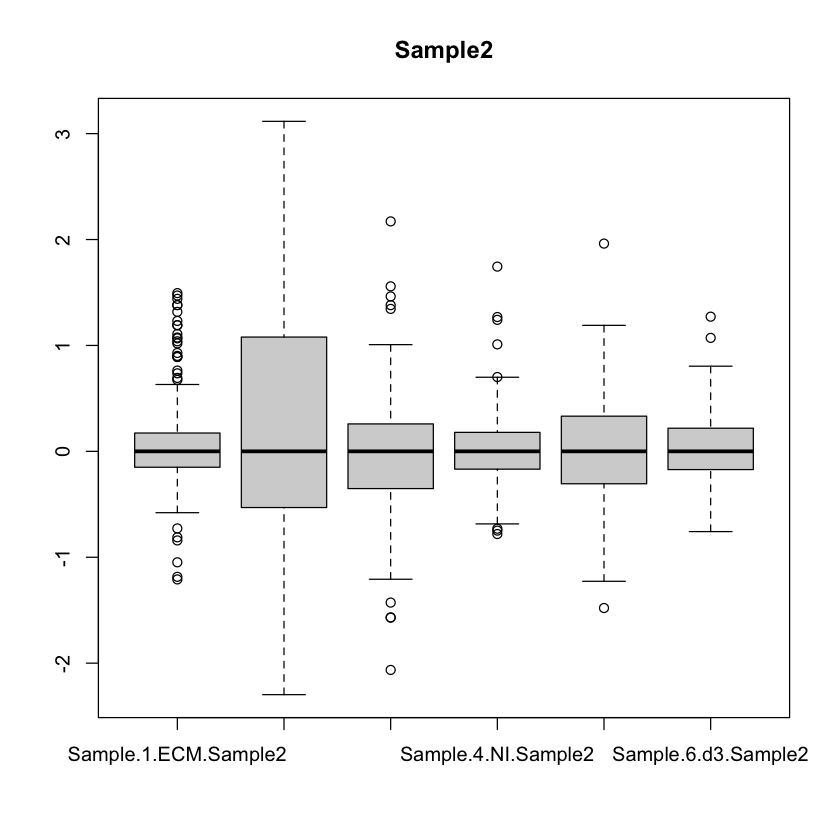

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.Sample1,Sample.4.d3.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.248626995,0.08482166,-0.1342562315,0.27369535,0.03701511,0.20004669
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.752070355,0.48014798,0.2143304820,0.75728166,-0.63532762,-1.35580728
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589",0.483832190,0.43671042,0.1839473541,0.73893581,-0.61776594,-1.01296426
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589, P11591",0.218744824,0.45148723,0.2468080137,0.65389492,-0.56586132,-0.79237810
A3KGS3,-0.698256751,-0.77812749,-0.7236462783,-0.80815166,1.49071953,1.73015821
A6X935,0.426225685,-0.05515820,-0.0103488292,0.07170133,-0.32420736,0.10448294
"B2RSH2, P08752, P18872, P20612, P27600, P27601, P50149, P63094, Q3V3I2, Q6R0H7, Q8CGK7, Q9DC51",-0.025480313,-0.12728499,-0.2029566973,-0.14623193,0.36098449,0.35366502
"C0HKE1, C0HKE2, C0HKE3, C0HKE4, C0HKE5, C0HKE6, C0HKE7, C0HKE8, C0HKE9, P27661, Q64522, Q64523, Q6GSS7, Q8BFU2, Q8CGP5, Q8CGP6, Q8CGP7, Q8R1M2",-0.294189898,-0.14018121,-0.1434880975,-0.08213545,0.29519591,0.57749432
E9PV24,0.157462138,-0.05928337,-0.2243394451,0.14980228,-0.04974268,0.23879665
E9Q414,0.127381452,0.03200826,0.1281166843,0.30864443,-0.19090183,-0.19255342


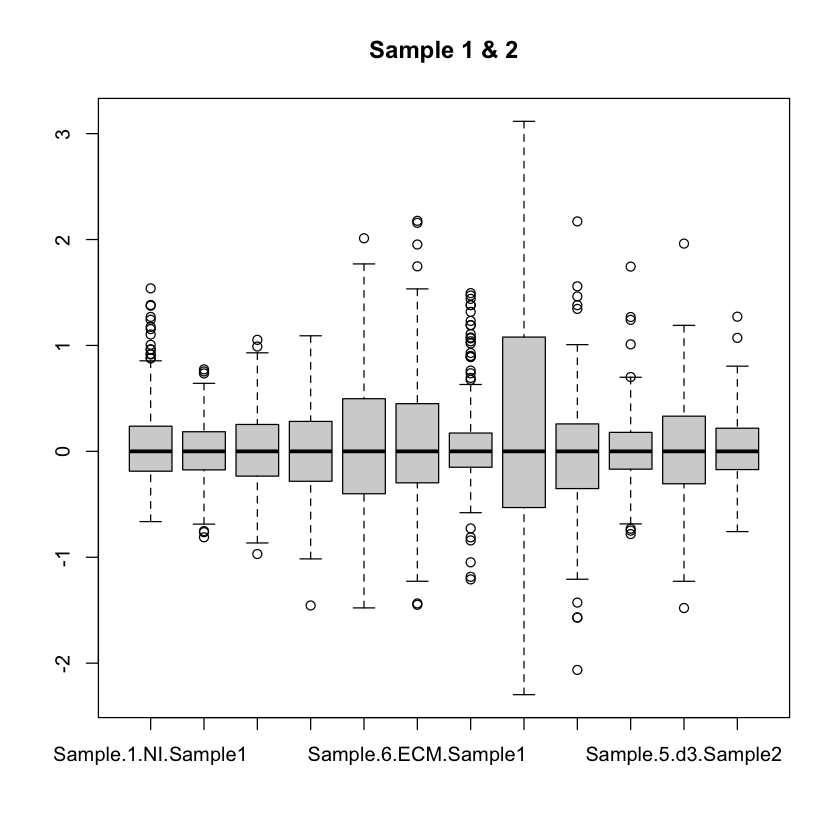

In [6]:
#Normalize samples (columns) by their median.
#The data is already log-transformed with a base of 2 (log2).
ProteinsDataLog1 <- as.matrix(Proteins1)
ProteinsDataLog2 <- as.matrix(Proteins2)
ProteinsDataLog3 <- as.matrix(Proteins3)
NormalizedData1 <- t(t(ProteinsDataLog1) - colMedians(ProteinsDataLog1,na.rm=T))
NormalizedData2 <- t(t(ProteinsDataLog2) - colMedians(ProteinsDataLog2,na.rm=T))
NormalizedData3 <- t(t(ProteinsDataLog3) - colMedians(ProteinsDataLog3,na.rm=T))
boxplot(NormalizedData1, main="Sample1")  
boxplot(NormalizedData2, main="Sample2")  
boxplot(NormalizedData3, main="Sample 1 & 2")  
NormalizedData1

•	Filter table to have at least 6 values per row/protein (this identifies the correct rows: rowSums(!is.na(Proteins))>5). How many proteins do you have left? 

In [7]:
Proteinscorr1 <- NormalizedData1[rowSums(!is.na(NormalizedData1))>5,]
Proteinscorr2 <- NormalizedData2[rowSums(!is.na(NormalizedData2))>5,]
Proteinscorr3 <- NormalizedData3[rowSums(!is.na(NormalizedData3))>5,]


•	Calculate Pearson’s correlations (cor function, you might need the use=“na.or.complete” argument) between all samples and plot all of them at once with the levelplot function (library lattice). You should see slightly higher correlations between replicates. 

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.Sample1,Sample.4.d3.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1
Sample.1.NI.Sample1,1.0000000,0.4607028,0.1296081,0.2656689,-0.5668262,-0.5556567
Sample.2.NI.Sample1,0.4607028,1.0000000,0.7797740,0.8025483,-0.8584352,-0.8811670
Sample.3.d3.Sample1,0.1296081,0.7797740,1.0000000,0.8088693,-0.7672249,-0.7853179
Sample.4.d3.Sample1,0.2656689,0.8025483,0.8088693,1.0000000,-0.8567277,-0.8142247
Sample.5.ECM.Sample1,-0.5668262,-0.8584352,-0.7672249,-0.8567277,1.0000000,0.7685193
Sample.6.ECM.Sample1,-0.5556567,-0.8811670,-0.7853179,-0.8142247,0.7685193,1.0000000


,Sample.1.ECM.Sample2,Sample.2.ECM.Sample2,Sample.3.NI.Sample2,Sample.4.NI.Sample2,Sample.5.d3.Sample2,Sample.6.d3.Sample2
Sample.1.ECM.Sample2,1.0000000,-0.1028076,-0.1064211,-0.53207373,0.179207885,-0.554932947
Sample.2.ECM.Sample2,-0.1028076,1.0000000,-0.7482957,-0.38767053,-0.644589324,-0.382757940
Sample.3.NI.Sample2,-0.1064211,-0.7482957,1.0000000,0.22486591,0.203296500,0.225793529
Sample.4.NI.Sample2,-0.5320737,-0.3876705,0.2248659,1.00000000,-0.014993386,0.562146618
Sample.5.d3.Sample2,0.1792079,-0.6445893,0.2032965,-0.01499339,1.000000000,0.001057436
Sample.6.d3.Sample2,-0.5549329,-0.3827579,0.2257935,0.56214662,0.001057436,1.000000000


,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.Sample1,Sample.4.d3.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample.1.ECM.Sample2,Sample.2.ECM.Sample2,Sample.3.NI.Sample2,Sample.4.NI.Sample2,Sample.5.d3.Sample2,Sample.6.d3.Sample2
Sample.1.NI.Sample1,1.000000000,0.5396110,0.2269141,0.3105086,-0.5532929,-0.5577837,-0.53256665,-0.29888873,0.2970197,0.51424717,-0.005799194,0.62134600
Sample.2.NI.Sample1,0.539610961,1.0000000,0.8190310,0.8119051,-0.7913293,-0.8069390,-0.33406324,-0.67316780,0.5588947,0.37263952,0.466123004,0.51530977
Sample.3.d3.Sample1,0.226914055,0.8190310,1.0000000,0.8320477,-0.7159146,-0.7126079,-0.22229013,-0.63891052,0.4646396,0.33538950,0.565228932,0.31727297
Sample.4.d3.Sample1,0.310508565,0.8119051,0.8320477,1.0000000,-0.8092756,-0.7642973,-0.29456596,-0.67408596,0.5031061,0.39226634,0.527958105,0.45326376
Sample.5.ECM.Sample1,-0.553292861,-0.7913293,-0.7159146,-0.8092756,1.0000000,0.9149711,0.46362355,0.67960083,-0.5397431,-0.52464393,-0.462725474,-0.59802954
Sample.6.ECM.Sample1,-0.557783651,-0.8069390,-0.7126079,-0.7642973,0.9149711,1.0000000,0.44895547,0.68913043,-0.5942481,-0.45492195,-0.460340132,-0.58639255
Sample.1.ECM.Sample2,-0.532566655,-0.3340632,-0.2222901,-0.2945660,0.4636235,0.4489555,1.00000000,-0.07520927,-0.1271231,-0.58696997,0.181569719,-0.59611807
Sample.2.ECM.Sample2,-0.298888726,-0.6731678,-0.6389105,-0.6740860,0.6796008,0.6891304,-0.07520927,1.00000000,-0.7241646,-0.38869701,-0.671342155,-0.35048029
Sample.3.NI.Sample2,0.297019698,0.5588947,0.4646396,0.5031061,-0.5397431,-0.5942481,-0.12712307,-0.72416461,1.0000000,0.21081927,0.198016927,0.15005347
Sample.4.NI.Sample2,0.514247167,0.3726395,0.3353895,0.3922663,-0.5246439,-0.4549220,-0.58696997,-0.38869701,0.2108193,1.00000000,0.020053085,0.58612101


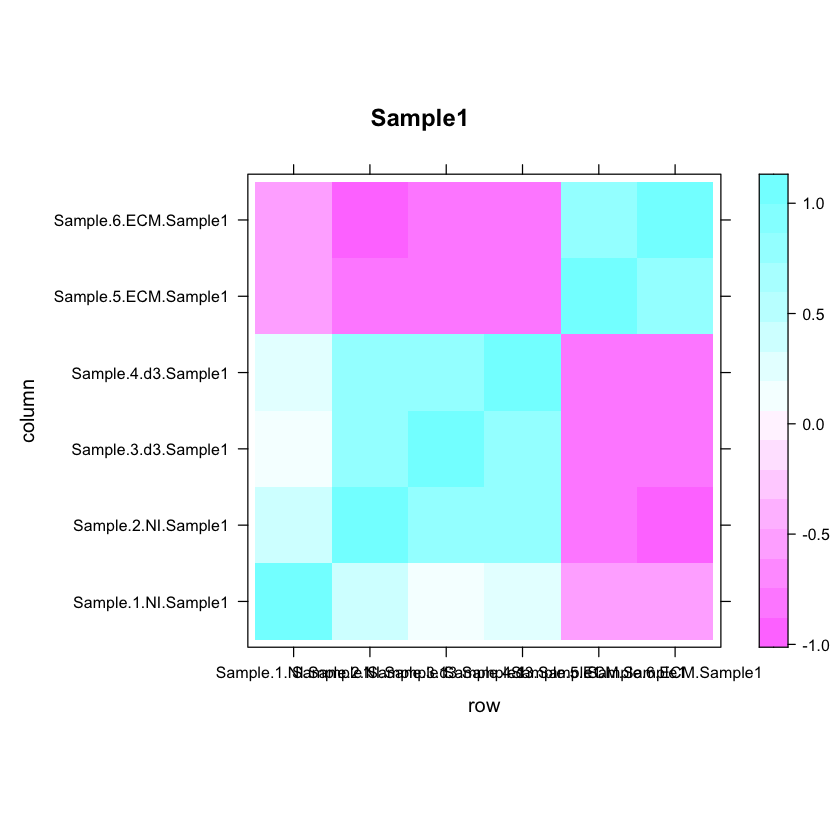

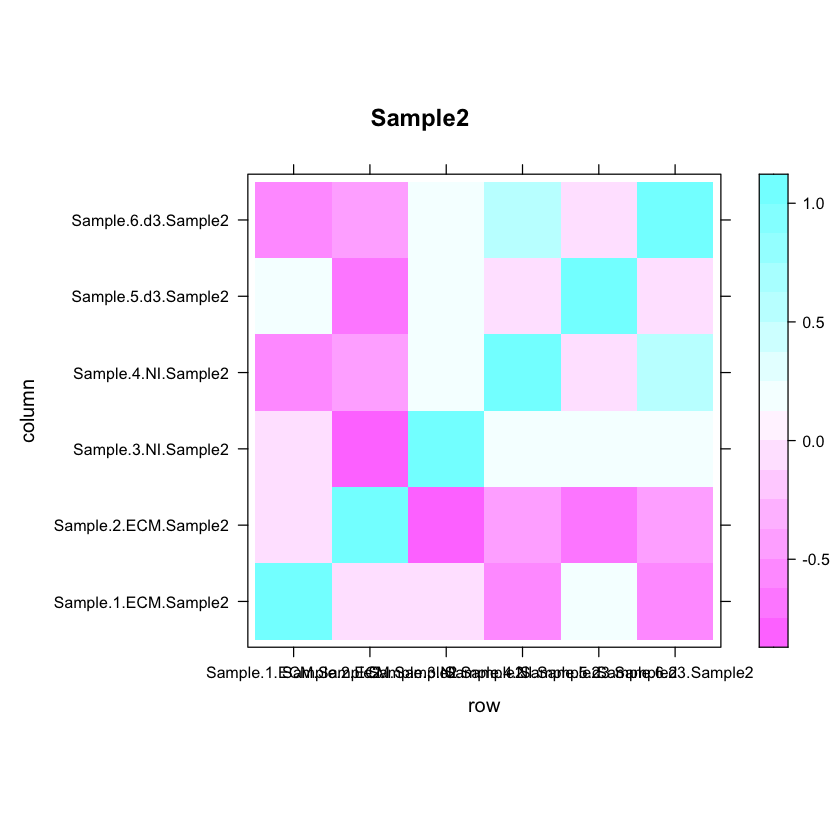

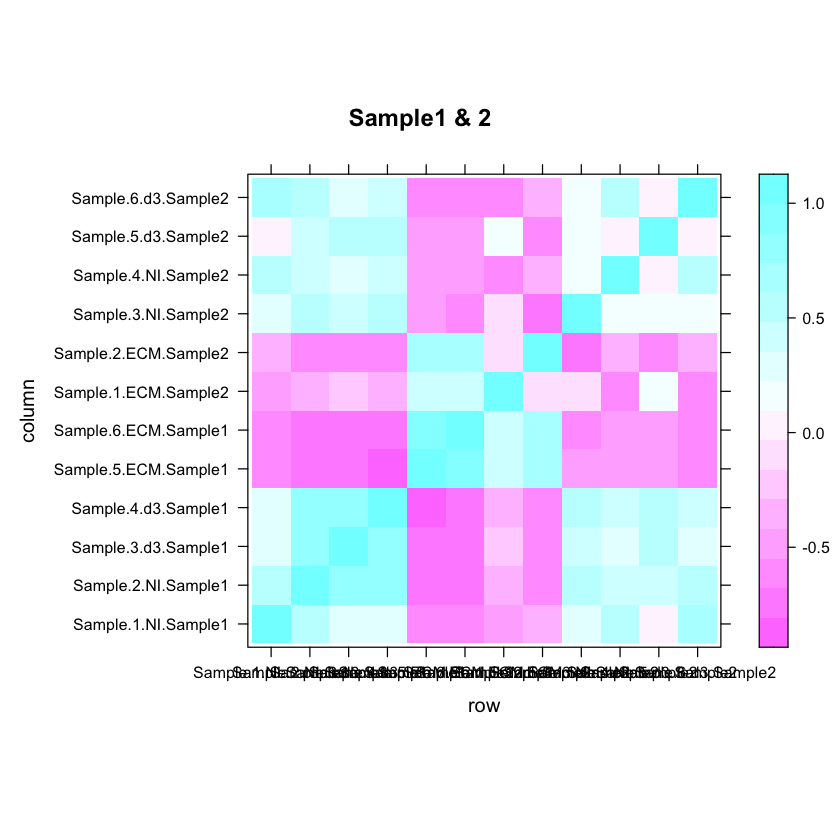

In [8]:
cor(Proteinscorr1,  use = "na.or.complete", method = "pearson")
cor(Proteinscorr2,  use = "na.or.complete", method = "pearson")
cor(Proteinscorr3,  use = "na.or.complete", method = "pearson")

levelplot(cor(Proteinscorr1,use = "na.or.complete", method = "pearson"),main="Sample1")
levelplot(cor(Proteinscorr2,  use = "na.or.complete", method = "pearson"),main="Sample2")
levelplot(cor(Proteinscorr3,  use = "na.or.complete", method = "pearson"),main="Sample1 & 2")

•	Carry out a PCA analysis of the data table. Plot the loadings to verify whether the samples can be separated into two groups. Try to use colors for better distinction of the samples. 

Importance of components:
                          PC1    PC2     PC3     PC4     PC5       PC6
Standard deviation     2.1163 0.9770 0.50152 0.40859 0.38478 1.309e-15
Proportion of Variance 0.7465 0.1591 0.04192 0.02782 0.02468 0.000e+00
Cumulative Proportion  0.7465 0.9056 0.94750 0.97532 1.00000 1.000e+00

,PC1,PC2,PC3,PC4,PC5,PC6
Sample.1.NI.Sample1,0.2495060,-0.863490336,0.008821974,-0.06239696,-0.24307724,-0.3592679
Sample.2.NI.Sample1,0.4442537,0.009593491,-0.217411938,-0.18705212,0.81450735,-0.2384701
Sample.3.d3.Sample1,0.4060496,0.420908687,-0.192658338,-0.53287107,-0.49089838,-0.3096926
Sample.4.d3.Sample1,0.4285563,0.254863208,0.383841887,0.68031459,-0.08521474,-0.3660057
Sample.5.ECM.Sample1,-0.4430519,0.082476018,-0.628281201,0.29942672,-0.02180529,-0.5585997
Sample.6.ECM.Sample1,-0.4422145,0.073285289,0.611117930,-0.35310372,0.16962603,-0.5216850


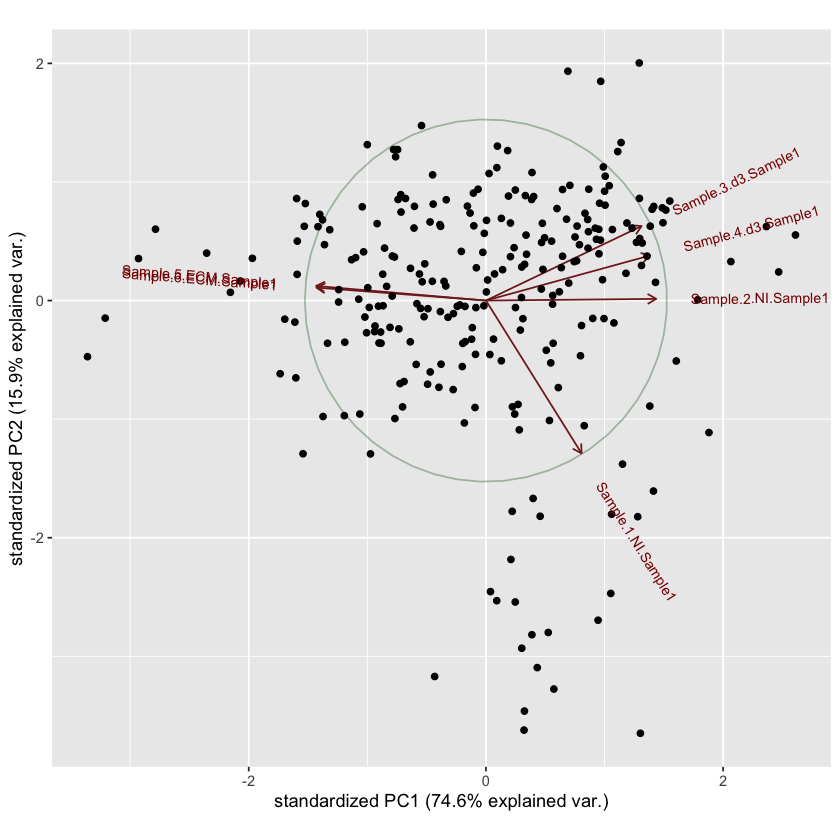

In [9]:
Proteins1.pca <- prcomp(Proteinscorr1, center = TRUE,scale. = TRUE)
summary(Proteins1.pca)
ggbiplot(Proteins1.pca,var.scale = 1, ellipse = TRUE, circle = TRUE)
Proteins1.pca$rotation

Importance of components:
                          PC1    PC2    PC3     PC4     PC5       PC6
Standard deviation     1.5964 1.3498 0.8538 0.68632 0.65526 1.677e-15
Proportion of Variance 0.4248 0.3037 0.1215 0.07851 0.07156 0.000e+00
Cumulative Proportion  0.4248 0.7284 0.8499 0.92844 1.00000 1.000e+00

,PC1,PC2,PC3,PC4,PC5,PC6
Sample.1.ECM.Sample2,0.2885782,0.5458976,-0.08654667,-0.641775806,-0.32487487,-0.3062814
Sample.2.ECM.Sample2,0.5121500,-0.4144884,0.02905241,0.176844513,0.08542962,-0.7255932
Sample.3.NI.Sample2,-0.4303933,0.2613488,-0.70843857,0.263721108,0.10611967,-0.4046764
Sample.4.NI.Sample2,-0.4537208,-0.3122649,0.13329447,-0.623505248,0.48645257,-0.2312266
Sample.5.d3.Sample2,-0.2322026,0.5139423,0.66438212,0.313887562,0.17494860,-0.3337802
Sample.6.d3.Sample2,-0.4576090,-0.3166165,0.17495543,0.004100486,-0.78016254,-0.2259827


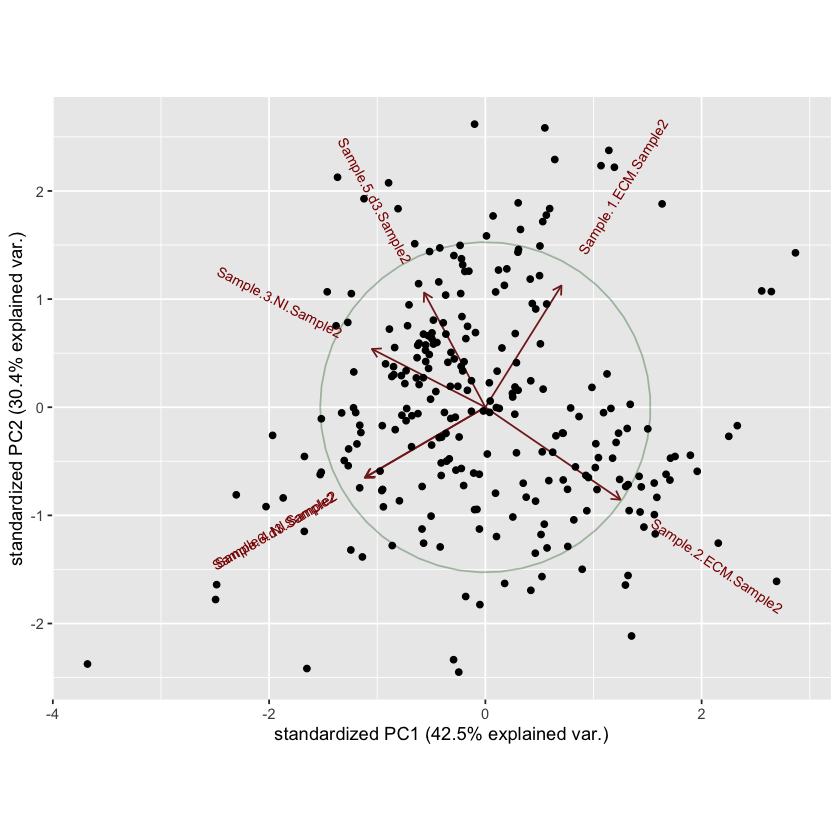

In [10]:
Proteins2.pca <- prcomp(Proteinscorr2, center = TRUE,scale. = TRUE)
summary(Proteins2.pca)
ggbiplot(Proteins2.pca, var.scale = 1, ellipse = TRUE, circle = TRUE)
Proteins2.pca$rotation

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.5614 1.4743 0.91616 0.80057 0.75016 0.60609 0.58456
Proportion of Variance 0.5467 0.1811 0.06995 0.05341 0.04689 0.03061 0.02848
Cumulative Proportion  0.5467 0.7279 0.79780 0.85121 0.89811 0.92872 0.95720
                           PC8     PC9    PC10    PC11     PC12
Standard deviation     0.44569 0.39239 0.30287 0.26326 1.63e-15
Proportion of Variance 0.01655 0.01283 0.00764 0.00578 0.00e+00
Cumulative Proportion  0.97375 0.98658 0.99422 1.00000 1.00e+00

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Sample.1.NI.Sample1,0.2346818,-0.35828196,-0.23440695,0.23156180,0.5481056,-0.28604535,0.43740888,-0.07411039,0.16966000,0.31397482,0.03956899,-4.655361e-16
Sample.2.NI.Sample1,0.3513008,0.06913164,0.03123744,-0.20301927,0.2350552,0.14256287,0.38748528,0.26176899,-0.06396232,-0.72451682,-0.07973227,6.574579e-16
Sample.3.d3.Sample1,0.3166348,0.20744073,0.25501165,-0.31837786,-0.1657117,0.09755391,0.38505936,0.13668452,-0.42815945,0.54242892,-0.09399568,-1.711243e-16
Sample.4.d3.Sample1,0.3390415,0.13889065,0.20149275,-0.23475535,-0.1246287,0.23811144,0.05284734,-0.27427503,0.73632346,0.09382649,0.26234744,-4.702496e-17
Sample.5.ECM.Sample1,-0.3646058,0.02067636,-0.05488852,0.04360835,-0.0534182,0.12723276,0.26025314,0.54330779,0.07318972,0.07194402,0.68500455,1.353272e-17
Sample.6.ECM.Sample1,-0.3622146,0.00223669,0.02623406,0.08852039,-0.1564111,0.13618512,0.32514898,0.30363278,0.42755239,0.09477571,-0.65388262,-7.615593e-16
Sample.1.ECM.Sample2,-0.1801865,0.50165486,-0.14510887,0.37329358,0.1539686,0.38290990,0.28223589,-0.42243056,-0.13988329,-0.01870389,0.03917310,3.249428e-01
Sample.2.ECM.Sample2,-0.3072710,-0.29090925,0.25746487,-0.43440458,0.1324517,-0.11229283,0.06364215,-0.14102009,-0.01215268,-0.04086165,0.01796162,7.139543e-01
Sample.3.NI.Sample2,0.2457063,0.16474463,-0.75439501,-0.21435911,-0.1621333,-0.03611487,-0.16654339,0.23184501,0.08799198,0.09700489,-0.06713066,4.082727e-01
Sample.4.NI.Sample2,0.2294308,-0.33934153,0.03345264,0.40650546,-0.6762998,-0.13327734,0.28301931,-0.11026517,-0.06265056,-0.17162576,0.08582701,2.401951e-01


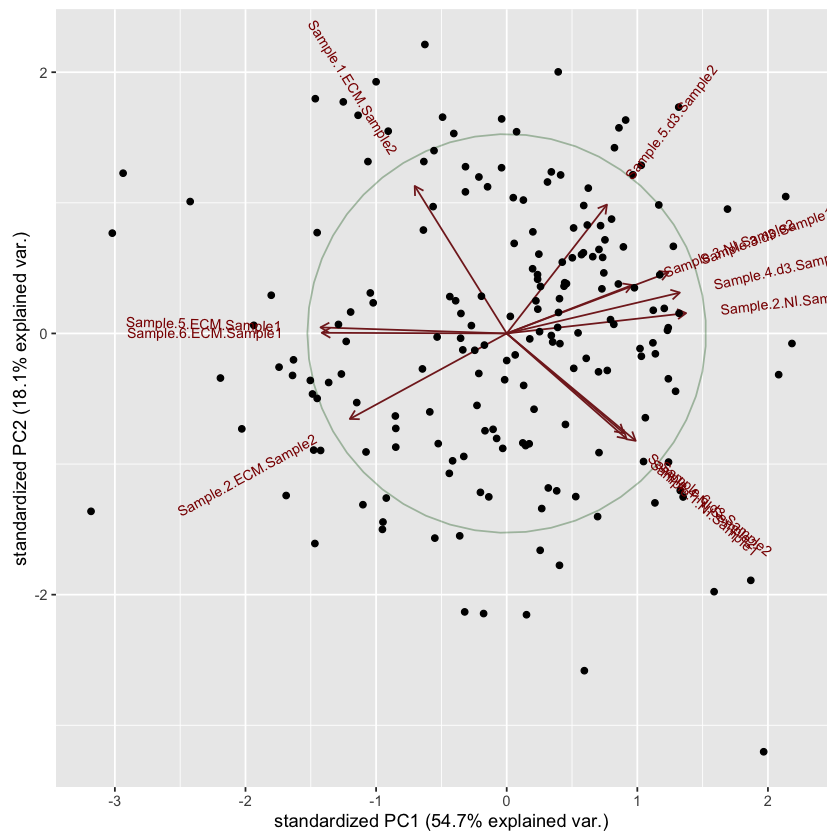

In [11]:
#all samples pca
Proteinscorr3 <- na.omit(Proteinscorr3)
Proteins3.pca <- prcomp(Proteinscorr3, center = TRUE,scale. = TRUE)
summary(Proteins3.pca)
ggbiplot(Proteins3.pca, var.scale = 1, ellipse = TRUE, circle = TRUE)
Proteins3.pca$rotation

•	Apply a t-test for each protein to see whether it is significantly changed between the conditions NI and ECM (use for loop or apply on t.test(conditionA, conditionB)$p.value) 

In [12]:
g_1 <- as.matrix(Proteinscorr1 [,1:2])
g_2 <- as.matrix(Proteinscorr1 [,5:6])
g_3 <- as.matrix(Proteinscorr2 [,3:4])
g_4 <- as.matrix(Proteinscorr2 [,1:2])
g_5 <- as.matrix(Proteinscorr3 [,c(1,2,9,10)])
g_6 <- as.matrix(Proteinscorr3 [,c(5,6,7,8)])

#sample1 use t.test
pval_1 <- vector(,nrow(Proteinscorr1))
for (i in 1:nrow(Proteinscorr1)){
    pval_1[i] <- t.test(g_1[i,],g_2[i,])$p.value
}
#sample2 use t.test
pval_2 <- vector(,nrow(Proteinscorr2))
for (i in 1:nrow(Proteinscorr2)){
    pval_2[i] <- t.test(g_3[i,],g_4[i,])$p.value
}
#all samples use t.test
pval_3 <- vector(,nrow(Proteinscorr3))
for (i in 1:nrow(Proteinscorr3)){
    pval_3[i] <- t.test(g_5[i,],g_6[i,])$p.value
}

•	Plot the distribution of p-values. How does the distribution look when you have a) no differential expression or b) a lot of differential expression? 

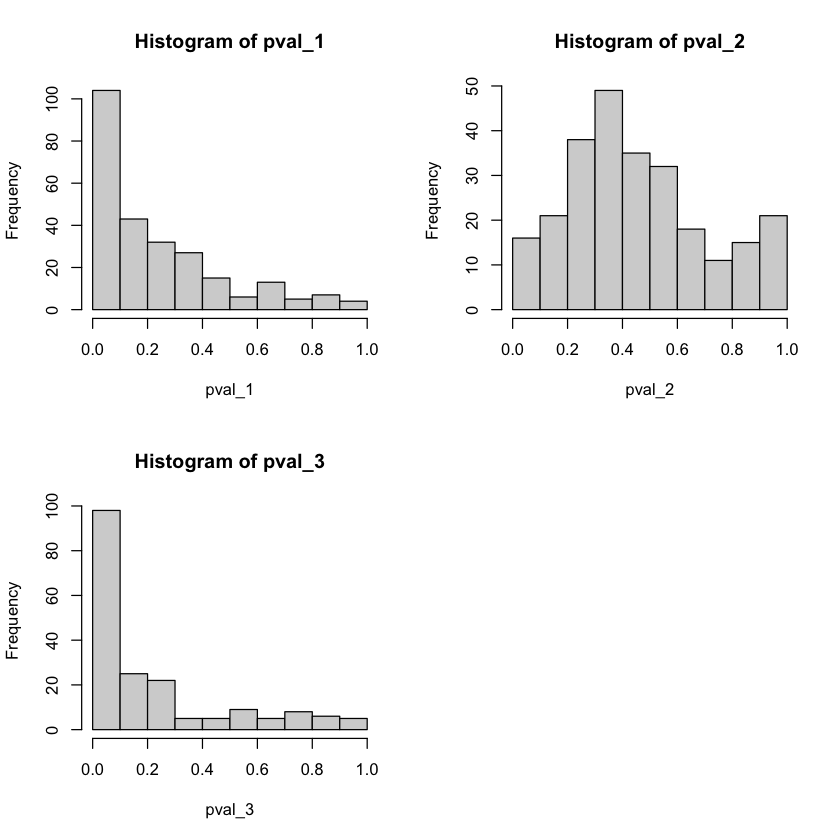

In [13]:
par(mfrow=c(2,2))  
hist(pval_1)
hist(pval_2)
hist(pval_3)

•	Show the false discovery rates (p-values corrected by Benjamini-Hochberg) in a volcano plot (they are shown as -log10(FDRs)). 

[1] 57

[1] 12

[1] 0

[1] 0

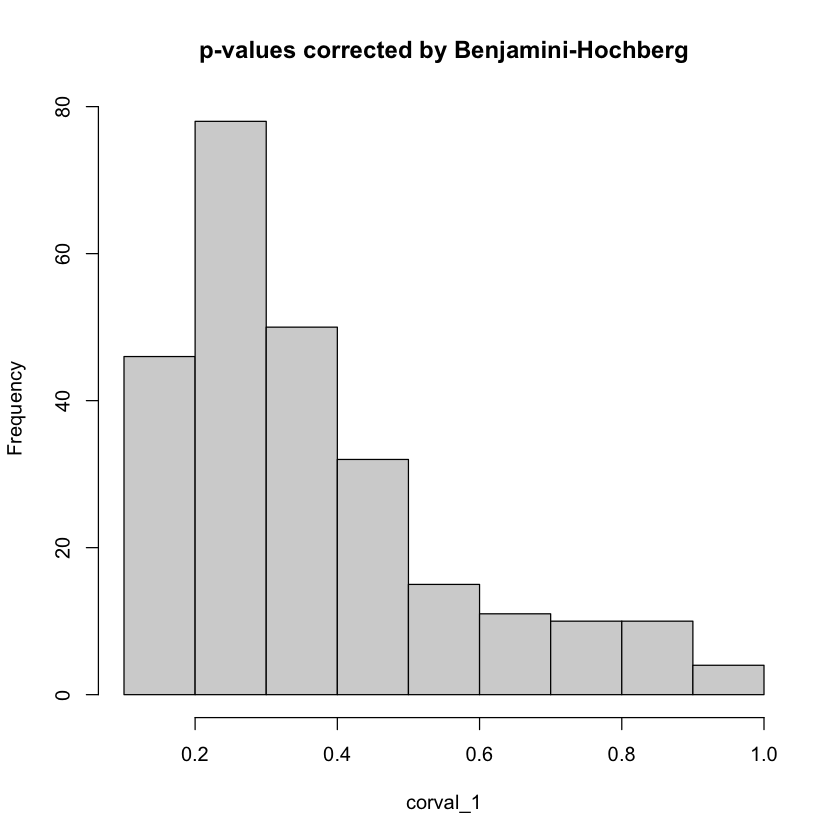

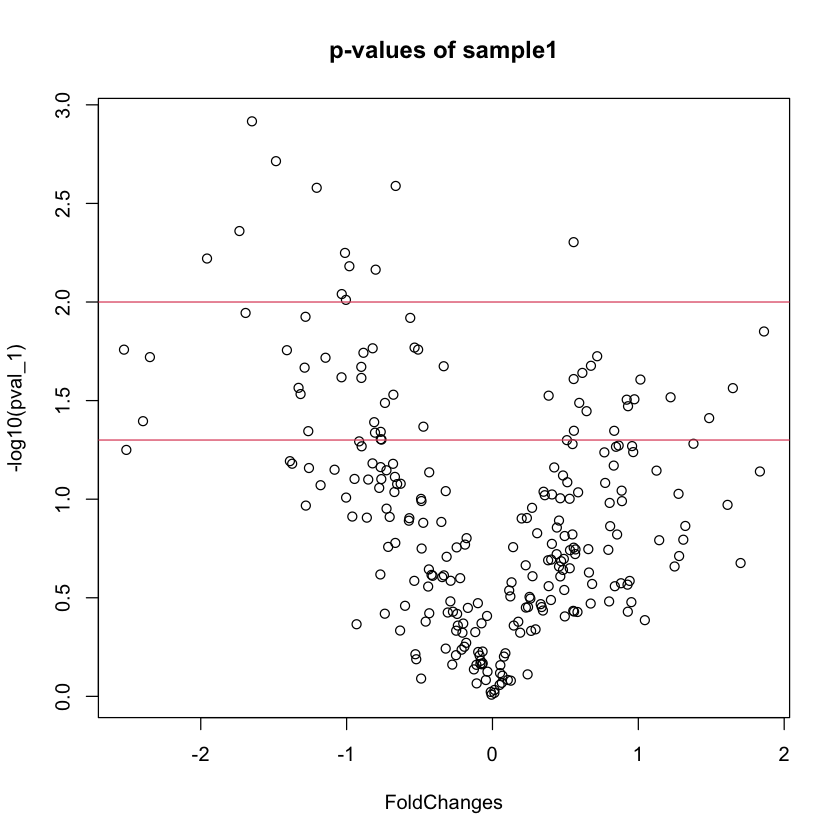

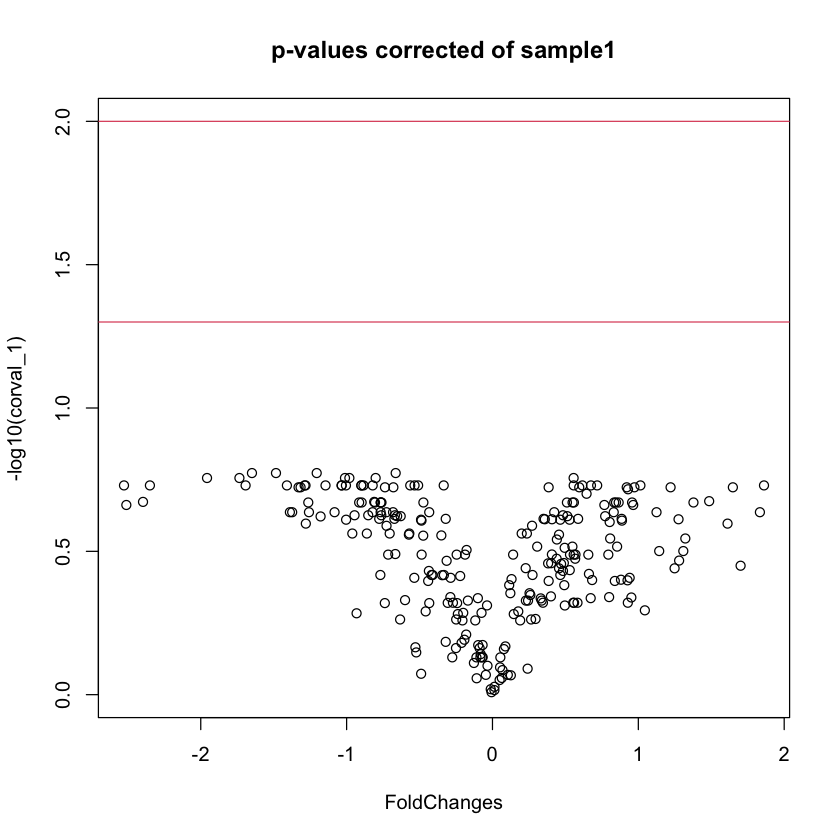

In [14]:
#p-values corrected by Benjamini-Hochberg
corval_1 <- p.adjust(pval_1,method="BH")
hist(corval_1,main="p-values corrected by Benjamini-Hochberg")

sum(pval_1 < 0.05)
sum(pval_1 < 0.01)
sum(corval_1 < 0.05)
sum(corval_1 < 0.01)

FoldChanges <- rowMeans(g_1,na.rm = T) - rowMeans(g_2,na.rm = T)


plot(FoldChanges,-log10(pval_1),main="p-values of sample1")
abline(h=2, col=2)
abline(h=1.3, col=2)

plot(FoldChanges, -log10(corval_1),main="p-values corrected of sample1",ylim=c(0,2))
abline(h=2, col=2)
abline(h=1.3, col=2)

[1] 5

[1] 0

[1] 0

[1] 0

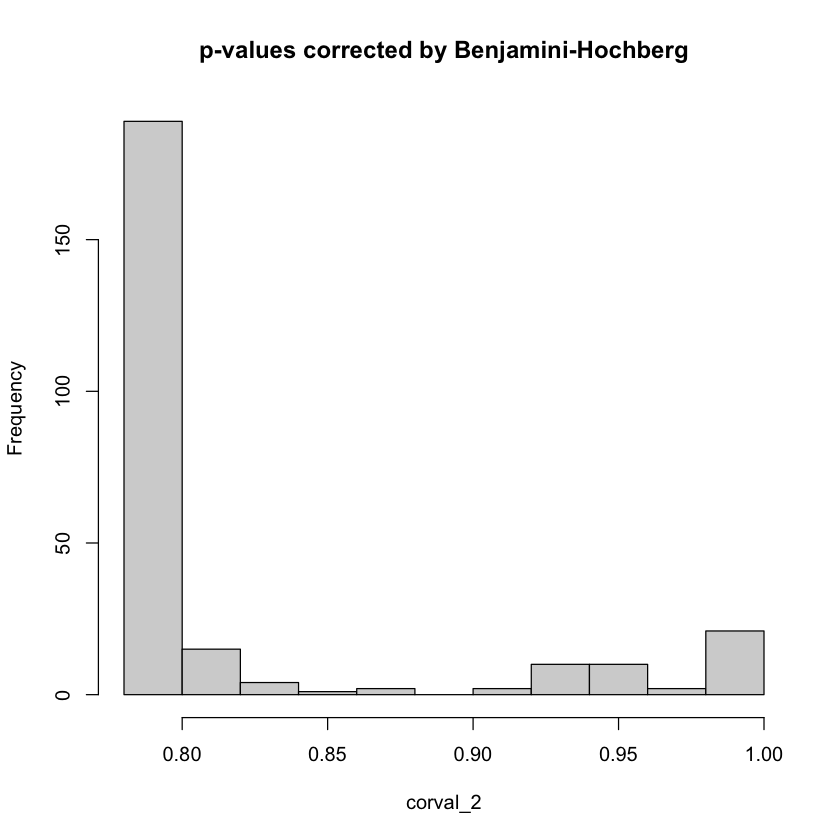

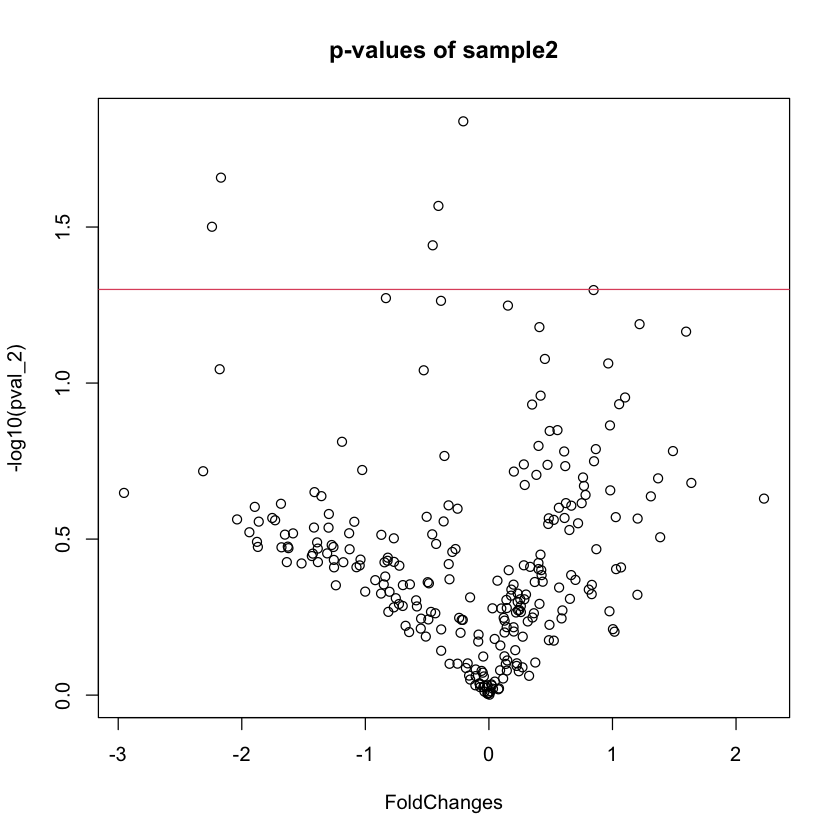

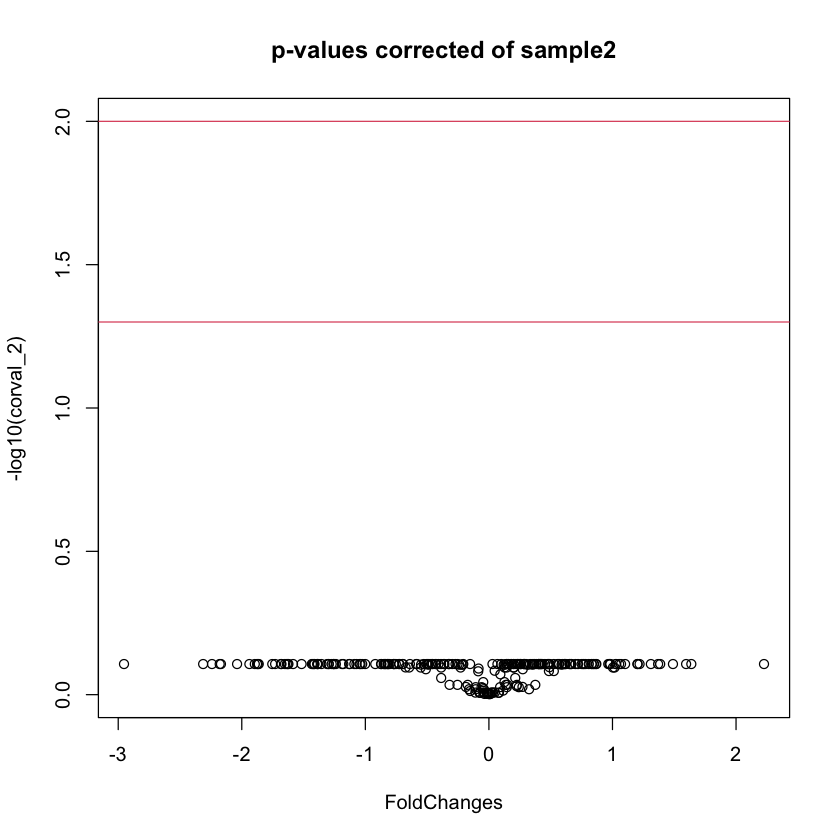

In [15]:
# sample2 
#p-values corrected by Benjamini-Hochberg
corval_2 <- p.adjust(pval_2,method="BH")
hist(corval_2,main="p-values corrected by Benjamini-Hochberg")

sum(pval_2 < 0.05)
sum(pval_2 < 0.01)
sum(corval_2 < 0.05)
sum(corval_2 < 0.01)

FoldChanges <- rowMeans(g_3,na.rm = T) - rowMeans(g_4,na.rm = T)


plot(FoldChanges,-log10(pval_2),main="p-values of sample2")
abline(h=2, col=2)
abline(h=1.3, col=2)

plot(FoldChanges, -log10(corval_2),main="p-values corrected of sample2",ylim=c(0,2))
abline(h=2, col=2)
abline(h=1.3, col=2)

[1] 71

[1] 23

[1] 5

[1] 1

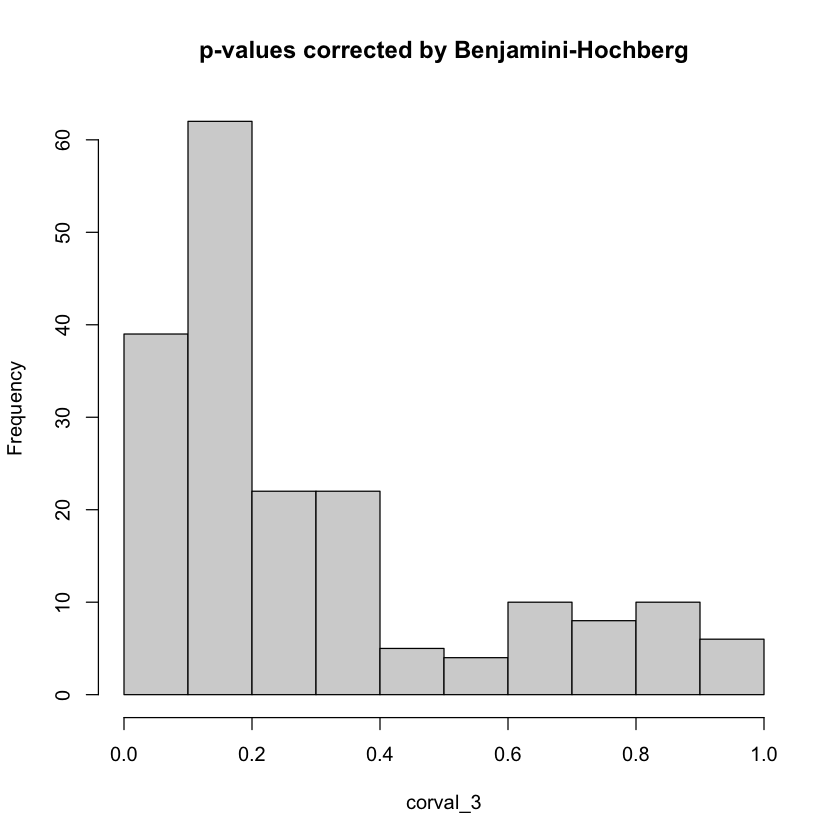

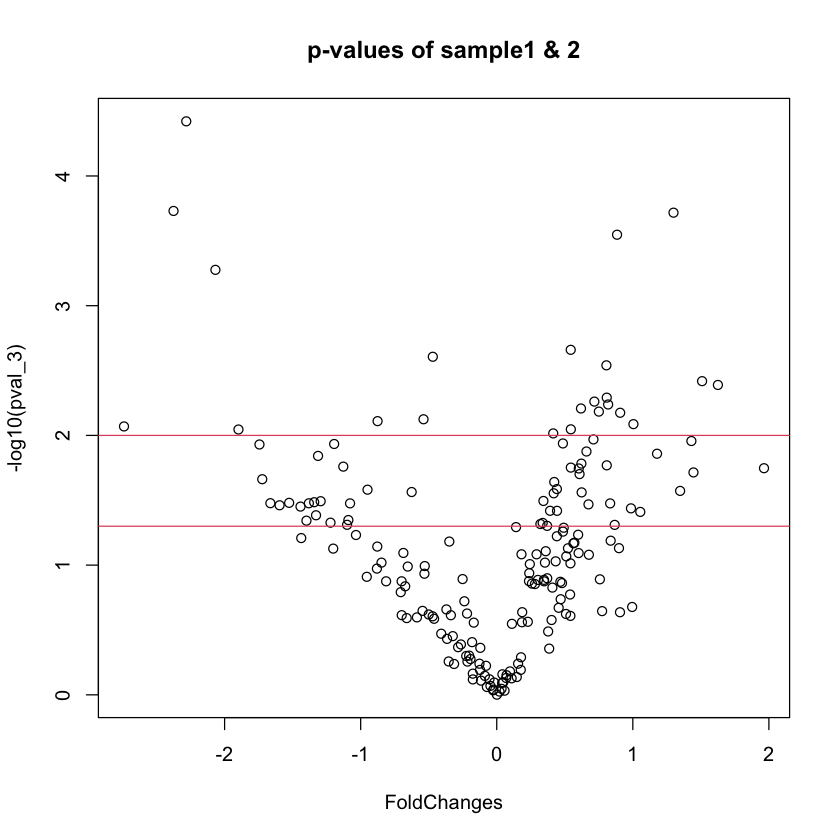

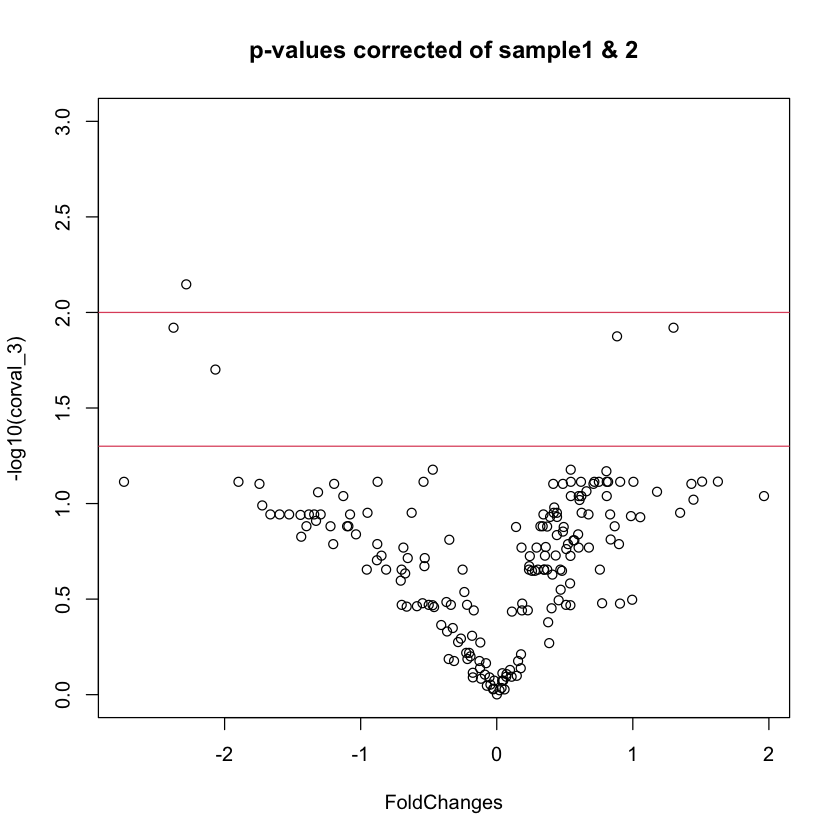

In [16]:
# all sample
#p-values corrected by Benjamini-Hochberg
corval_3 <- p.adjust(pval_3,method="BH")
hist(corval_3,main="p-values corrected by Benjamini-Hochberg")

sum(pval_3 < 0.05)
sum(pval_3 < 0.01)
sum(corval_3 < 0.05)
sum(corval_3 < 0.01)

FoldChanges <- rowMeans(g_5,na.rm = T) - rowMeans(g_6,na.rm = T)


plot(FoldChanges,-log10(pval_3),main="p-values of sample1 & 2")
abline(h=2, col=2)
abline(h=1.3, col=2)

plot(FoldChanges, -log10(corval_3),main="p-values corrected of sample1 & 2",ylim=c(0,3))
abline(h=2, col=2)
abline(h=1.3, col=2)

• Do you find any regulated proteins? If yes/no, speculate why. 

• Apply hierarchical clustering of the 50 most “regulated” proteins using the heatmap function. I would expect 2 very distinct groups? Which would they be? 

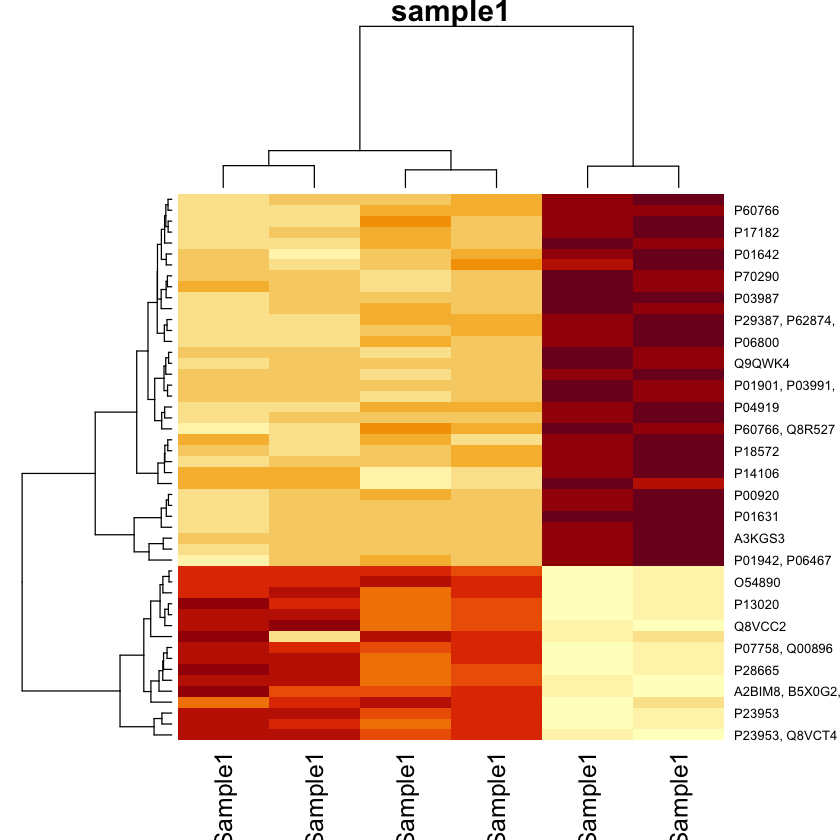

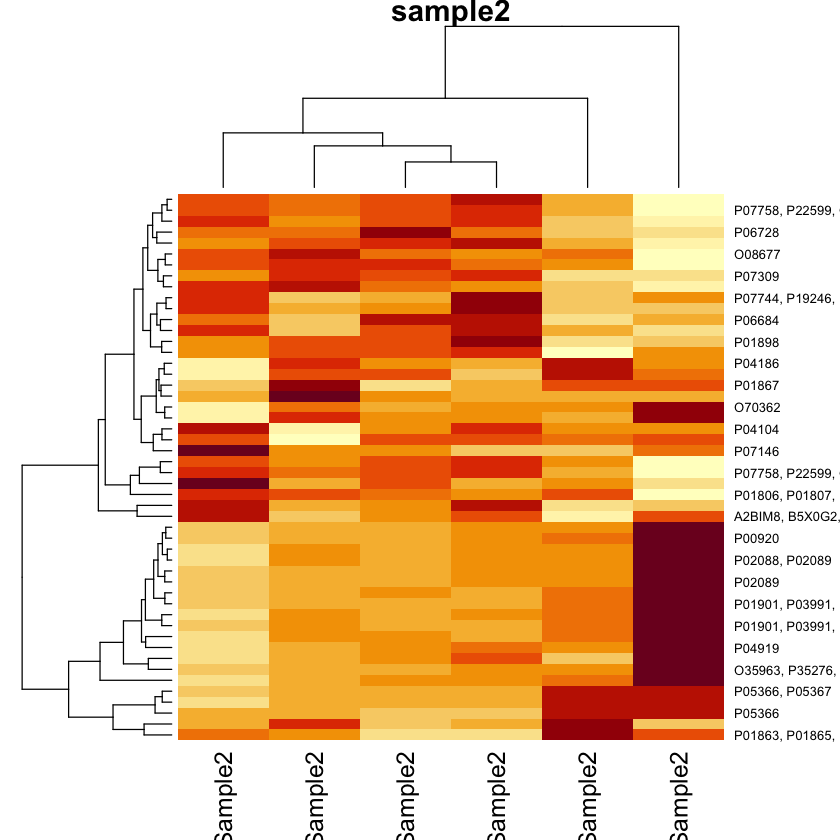

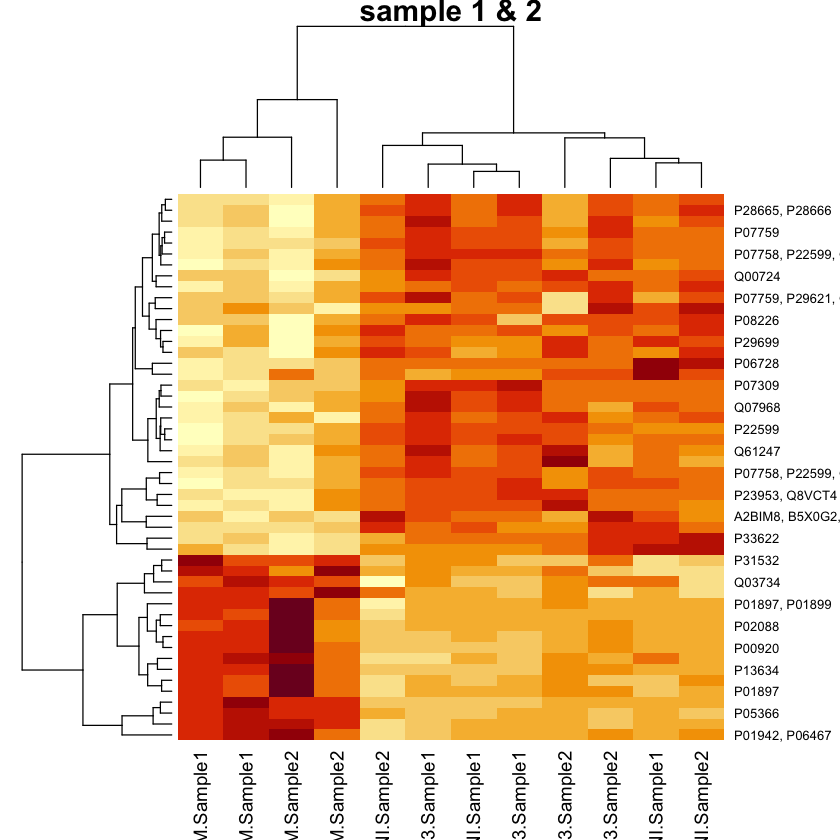

In [17]:
# top 50 regulated proteins given that qvals contains the FDRs/corrected p-values
qvals_1 <- qvalue(pval_1)$qvalues
heatmap(as.matrix(Proteinscorr1[order(qvals_1), ][1:50,]),main="sample1")
qvals_2 <- qvalue(pval_2)$qvalues
heatmap(as.matrix(Proteinscorr2[order(qvals_2), ][1:50,]),main="sample2")
qvals_3 <- qvalue(pval_3)$qvalues
heatmap(as.matrix(Proteinscorr3[order(qvals_3), ][1:50,]),main="sample 1 & 2")

In [18]:
top50_sample1 <- Proteinscorr1[order(qvals_1), ][1:50,]
top50_sample2 <- Proteinscorr1[order(qvals_2), ][1:50,]
top50_sample3 <- Proteinscorr1[order(qvals_3), ][1:50,]
acc_1 <- row.names(top50_sample1)
acc_2 <- row.names(top50_sample2)
acc_3 <- row.names(top50_sample3)

• Take these 50 proteins and copy their accession numbers into the tool GOrilla (http://cbl-gorilla.cs. technion.ac.il/). Do you get any meaningful terms for biological processes? It is enough to take the first accession number of each protein group. 

In [19]:
acc1_50<-c()
for (i in 1:length(acc_1)) {
  str1 <- strsplit(as.character(acc_1[i]),",",fixed = T)
  acc1_50[i] <- str1[[1]][1]
}
acc1_50

acc2_50 <- c()
for (i in 1:length(acc_1)) {
  str2 <- strsplit(as.character(acc_2[i]),",",fixed = T)
  acc2_50[i] <- str2[[1]][1]
}
acc2_50

acc3_50 <- c()
for (i in 1:length(acc_1)) {
  str3 <- strsplit(as.character(acc_3[i]),",",fixed = T)
  acc3_50[i] <- str3[[1]][1]
}
acc3_50

acc <- unique(acc3_50)

write.csv(acc, "most_regulated_proteins.csv", row.names = F)

[1] "P01631" "P01897" "P06330" "Q9QWK4" "P00920" "P03987" "P05367" "P08226"
 [9] "P17182" "P29387" "A2BIM8" "A3KGS3" "O35963" "O54890" "P01642" "P01872"
[17] "P01887" "P01897" "P01901" "P01942" "P01942" "P02088" "P02089" "P06800"
[25] "P14106" "P15508" "P18572" "P23953" "P28665" "P60766" "P62880" "P70290"
[33] "Q61735" "Q8VCC2" "P01898" "P04919" "P07758" "P07758" "P13020" "P13634"
[41] "P17156" "P60766" "Q06770" "Q921I1" "P23953" "Q00724" "P23953" "P05366"
[49] "P98086" "P01630"

[1] "A2BIM8" "A2BIM8" "A2BIM8" "A6X935" "B2RSH2" "C0HKE1" "E9PV24" "E9Q414"
 [9] "O35963" "O54890" "P01629" "P01635" "P01636" "P01654" "P01658" "P01664"
[17] "P01756" "P01796" "P01796" "P01806" "P01837" "P01863" "P01863" "P01867"
[25] "P01868" "P01872" "P01878" "P01887" "P01895" "P01897" "P01897" "P01897"
[33] "P01897" "P01898" "P01901" "P01901" "P01942" "P01942" "P02088" "P02088"
[41] "P02089" "P02535" "P03953" "P03991" "P03995" "P04104" "P04104" "P04104"
[49] "P04186" "P04918"

[1] "P01901" "P01901" "P42703" "P04104" "P01942" "P06909" "P11835" "P22599"
 [9] "A2BIM8" "P03995" "P01635" "P01654" "P01796" "P01867" "P02088" "P02535"
[17] "P04104" "P04104" "P0DP26" "P11276" "P11679" "P28665" "P04918" "O35963"
[25] "P01756" "P04186" "P07759" "P26041" "P05064" "P08226" "P07146" "P01895"
[33] "P04945" "P08752" "P14211" "P22599" "P24063" "P08730" "P04919" "P01837"
[41] "P29699" "B2RSH2" "P13634" "P21614" "P23953" "P33622" "P63101" "P01796"
[49] "P01863" "P01868"

In [20]:
intersect(intersect(acc1_50,acc2_50),acc3_50)

[1] "A2BIM8" "O35963" "P01901" "P01942" "P02088"